<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


***


# Project Scenario: 
You are a Data Scientist with a housing agency in Boston MA, you have been given
access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?

- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

## Task 1: Dataset variables

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Task 2: Import Libraries


All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. If you run this notebook in a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.


In [51]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y
#!  mamba install matplotlib=3.4.3-y
#!  mamba install statsmodels=0.12.0-y

Import the libraries we need for the lab


In [52]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [54]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

Read in the csv file from the URL using the request library


In [55]:
boston_df = pd.read_csv(boston_url)

In [56]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 3:  Exploratory Data Analysis

In [74]:
boston_df.shape

(506, 15)

In [75]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
 14  age_group   506 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 57.4+ KB


In [76]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 4: Descriptive Statistics and Visualizations

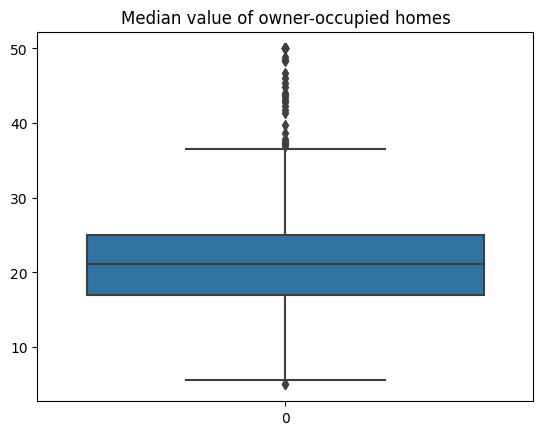

In [57]:
# This boxplot shows the "Median value of owner-occupied homes"
sns.boxplot(boston_df['MEDV'])
plt.title('Median value of owner-occupied homes')
plt.show()

### It can be inferred from the boxplot above that the median value of owner-occupied homes is about 22 and there are more outliers after the third quartile

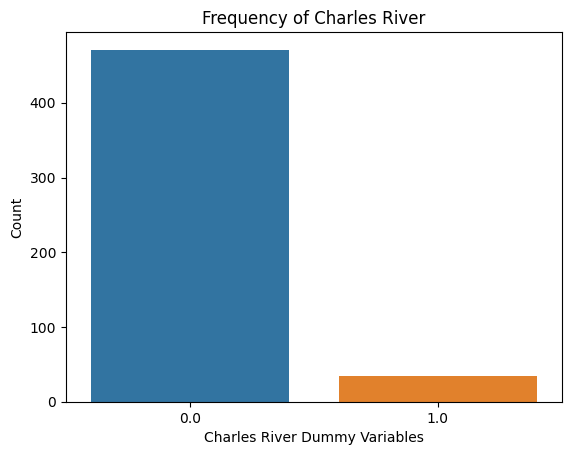

In [83]:
# This barplot shows the Charles river distribution

sns.barplot(x = boston_df['CHAS'].unique(), y = boston_df['CHAS'].value_counts(),data = boston_df)
plt.title('Frequency of Charles River')
plt.xlabel('Charles River Dummy Variables')
plt.ylabel('Count')
plt.show()

#### Note: Majority tracts don't bound Charles River

In [59]:
# Discretization of the age variable into 3 groups
boston_df.loc[(boston_df['AGE'] <=35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] >35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >=70, 'age_group'] = '70 years and older'

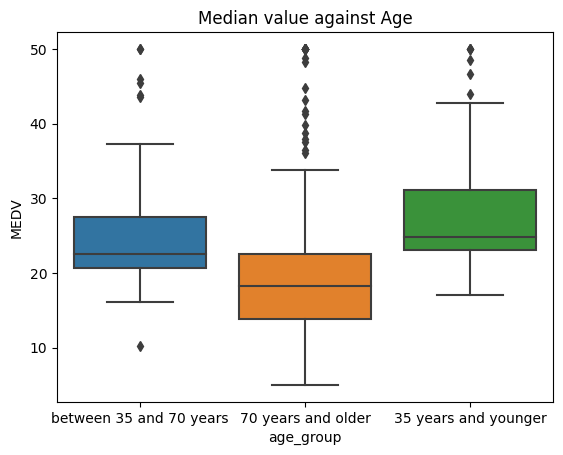

In [60]:
sns.boxplot(x = boston_df['age_group'], y = boston_df['MEDV'], data = boston_df)
plt.title('Median value against Age')
plt.show()

### The age group below 35 years pay the highest median house price while those above 70 are leaning towards the cheapest houses.

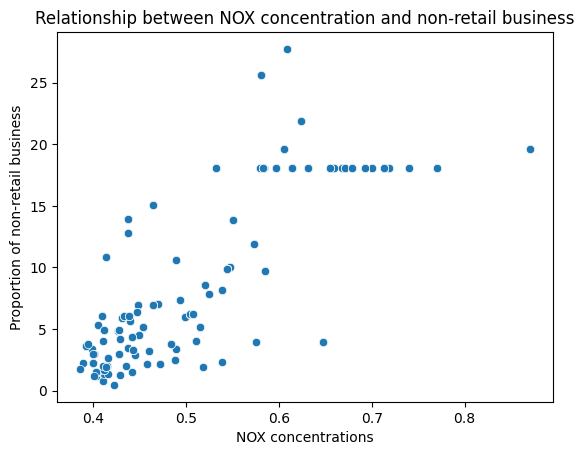

In [61]:
'''This scatterplot shows the relationship between Nox concentrations
and the proportion of non-retail business acres per town'''

sns.scatterplot(x = boston_df['NOX'], y = boston_df['INDUS'], data = boston_df)
plt.title('Relationship between NOX concentration and non-retail business')
plt.xlabel('NOX concentrations')
plt.ylabel('Proportion of non-retail business')
plt.show()


In [62]:
cor = boston_df[['NOX', 'INDUS']].corr()
cor

,NOX,INDUS
NOX,1.000000,0.763651
INDUS,0.763651,1.000000


#### Since the correlation coefficient is positive, it means that as one variable increases, the other variable tends to increase as well. A correlation coefficient of 0.763651 is considered to be relatively strong. However, it is important to note that correlation doesn't necessarily imply causation, and there might be other factors influencing the relationship between the variables.

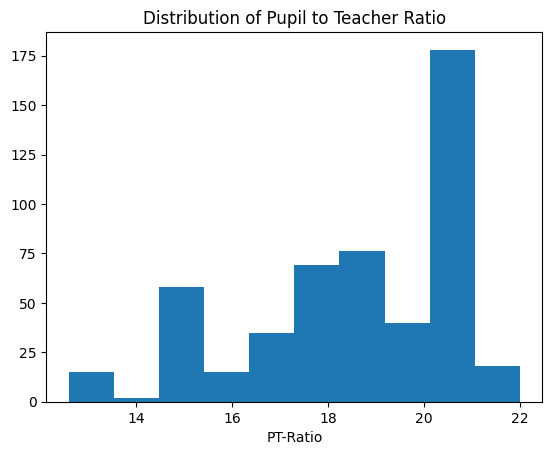

In [63]:
# This histogram below shows the distribution of the pupil to teacher ratio.

plt.hist(boston_df['PTRATIO'])
plt.title('Distribution of Pupil to Teacher Ratio')
plt.xlabel('PT-Ratio')
plt.show()


#### Note: Pupil to teacher ratio is lowest at 13-14 range and highest around range 20-21.

## Task 5: Use the appropriate tests to answer the questions provided


#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

##### alpha = 0.05
##### using levene test to determine if the variances are equal or not
##### null hypothesis: the varainces of median value of houses bounded by the Charles river is equal
##### alternative hypothesis: the variances of median value of houses bounded by the Charles river is unequal

In [64]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [65]:
# Since the pvalue of 0.003 is less than 0.05, we reject the null hypothesis
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

### Since the p-value of 0.003 is less than 0.05, we reject the null hypothesis and say the variances of median value of houses bounded by the Charles river is unequal

## ANOVA

##### alpha = 0.05
##### null hypothesis: no statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940
##### alternative hypothesis: there is a statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940

In [66]:
low = boston_df[boston_df['age_group']== "35 years and younger"]['MEDV']
medium = boston_df[boston_df['age_group']== 'between 35 and 70 years']['MEDV']
high = boston_df[boston_df['age_group']== "70 years and older"]['MEDV']

In [67]:
f_statistic, p_value = scipy.stats.f_oneway(low, medium, high, axis = 0)
print("F_statistic: {0}, P-value: {1}".format(f_statistic, p_value))

F_statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


### Since the p-value is less than the alpha value of 0.05, we reject the null hypothesis and say there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

## Pearson Correlation


##### alpha = 0.05
##### null hypothesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#### alternative hypothesis: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

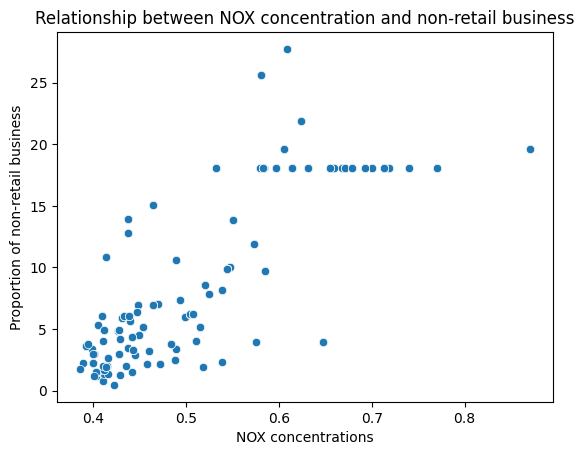

In [68]:
sns.scatterplot(x = boston_df['NOX'], y = boston_df['INDUS'], data = boston_df)
plt.title('Relationship between NOX concentration and non-retail business')
plt.xlabel('NOX concentrations')
plt.ylabel('Proportion of non-retail business')
plt.show()

In [69]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209189, pvalue=7.913361061211254e-98)

#### we have a pearson coefficent of 0.76, and a p-value of 7.9 times 10 raised to power -98 (7.9 x 10^-98). Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

## Regression Analysis

#### Alpha = 0.05
#### Null hypothesis: weighted distances to five Boston employment centres are not related to median value
#### Alternative Hypothesis: weighted distances to five Boston employment centres are related to median value

In [70]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
prediction = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        13:52:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
np.sqrt(0.062)  ##Pearson Coeffiecent value

0.24899799195977465

#### The square root of R-squared is 0.25, which implies weak correlation between both features

<ipython-input-72-7ffb5efce97f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(boston_df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2, cbar=False)


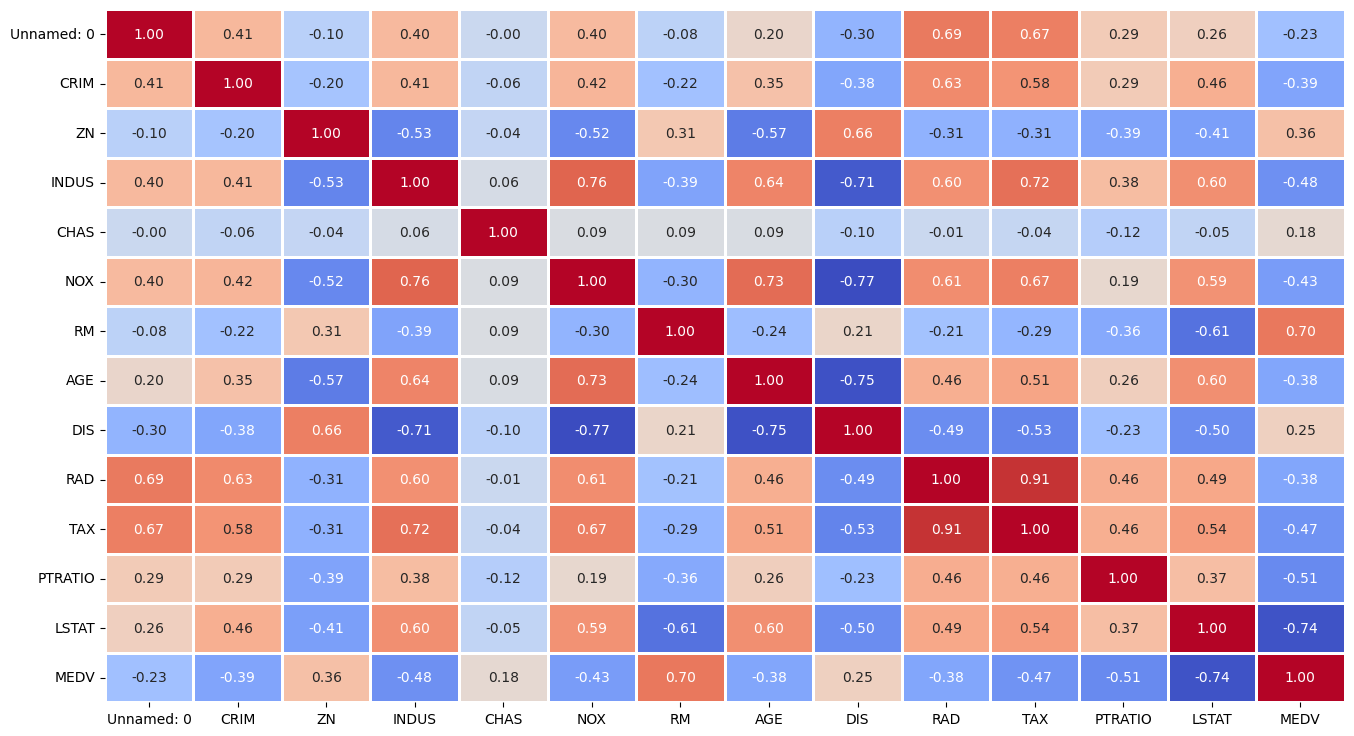

In [72]:
plt.figure(figsize=(16,9))
sns.heatmap(boston_df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2, cbar=False)
plt.show()

## Authors

Oluwaseyi Akinsanya
